# Actual Implementation

In [5]:
import train as T

In [6]:
import torch

In [7]:
# Configuration
sims = ['TNG50', 'TNG100', 'Eagle100', 'Simba100', 'TNG_ALL']
config = {
    'obs': 'mags_morph',
    'train_sim': sims[:-1],
    'batch_size': 128,
    'num_epochs': 20,
    'lr': 0.001,
    'alpha': 1e2,
    'feature_layers': [64, 16],
    'label_layers': [16, 8],
    'domain_layers': [16, 8],
    'es_patience': 5,
    'es_min_delta': 0.001
}

# hyper parameters - priors
# alpha - 0 to 1e3 (log scale)
# lr - 0.01 to 2e-5 (log scale)

/groups/chhahn/haloflow/venv/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1: 100%|██████████| 248/248 [00:00<00:00, 256.35it/s]


Epoch 1/20
Train Loss: 48.9715, Test Loss: 7.5791, Domain Accuracy: 0.4152


Epoch 2: 100%|██████████| 248/248 [00:00<00:00, 258.99it/s]


Epoch 2/20
Train Loss: 5.3796, Test Loss: 3.5255, Domain Accuracy: 0.3582


Epoch 3: 100%|██████████| 248/248 [00:00<00:00, 258.79it/s]


Epoch 3/20
Train Loss: 3.0642, Test Loss: 2.3239, Domain Accuracy: 0.3859


Epoch 4: 100%|██████████| 248/248 [00:00<00:00, 258.38it/s]


Epoch 4/20
Train Loss: 2.0253, Test Loss: 2.0389, Domain Accuracy: 0.4360


Epoch 5: 100%|██████████| 248/248 [00:00<00:00, 259.82it/s]


Epoch 5/20
Train Loss: 1.8151, Test Loss: 1.5666, Domain Accuracy: 0.4010


Epoch 6: 100%|██████████| 248/248 [00:00<00:00, 259.94it/s]


Epoch 6/20
Train Loss: 1.5788, Test Loss: 0.9871, Domain Accuracy: 0.4361


Epoch 7: 100%|██████████| 248/248 [00:00<00:00, 259.13it/s]


Epoch 7/20
Train Loss: 1.4714, Test Loss: 0.8802, Domain Accuracy: 0.4360


Epoch 8: 100%|██████████| 248/248 [00:00<00:00, 258.01it/s]


Epoch 8/20
Train Loss: 1.5904, Test Loss: 1.2118, Domain Accuracy: 0.4311


Epoch 9: 100%|██████████| 248/248 [00:00<00:00, 260.03it/s]


Epoch 9/20
Train Loss: 1.9729, Test Loss: 3.7674, Domain Accuracy: 0.4361


Epoch 10: 100%|██████████| 248/248 [00:00<00:00, 259.40it/s]


Epoch 10/20
Train Loss: 1.8912, Test Loss: 1.6250, Domain Accuracy: 0.4361


Epoch 11: 100%|██████████| 248/248 [00:00<00:00, 259.65it/s]


Epoch 11/20
Train Loss: 1.5310, Test Loss: 1.1119, Domain Accuracy: 0.4354


Epoch 12: 100%|██████████| 248/248 [00:00<00:00, 259.55it/s]


Epoch 12/20
Train Loss: 1.7887, Test Loss: 2.1506, Domain Accuracy: 0.4360
Early stopping


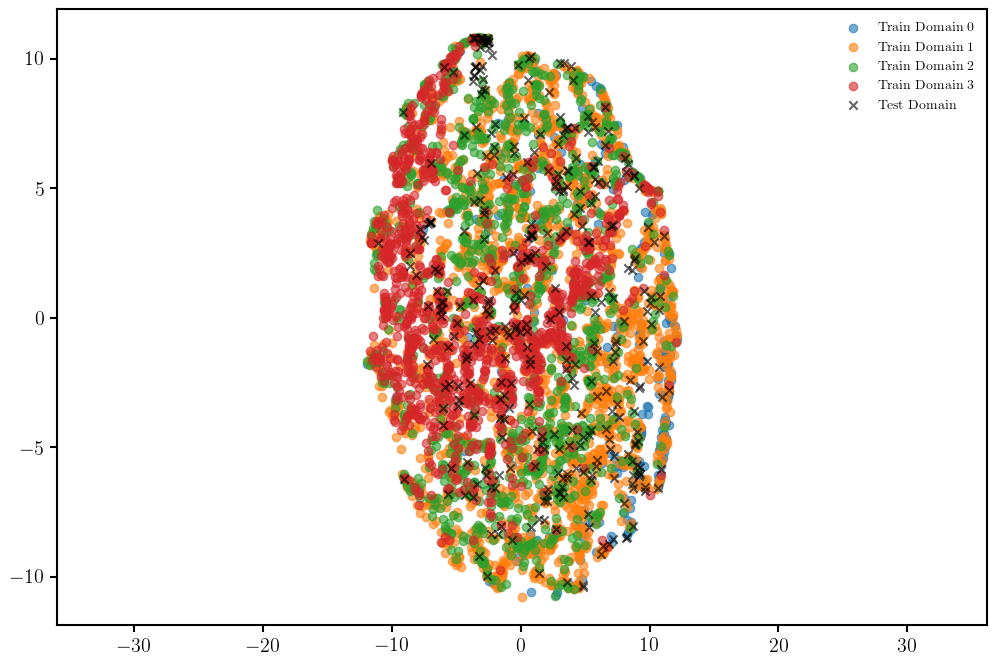

In [4]:
# Train
T.train_dann(config, use_wandb=False, plots=True)

# Priors

In [11]:
dat = dataset.data['TNG50']['Y_train']

In [12]:
sm = dat[:, 0]
hm = dat[:, 1]

(6717, 2)


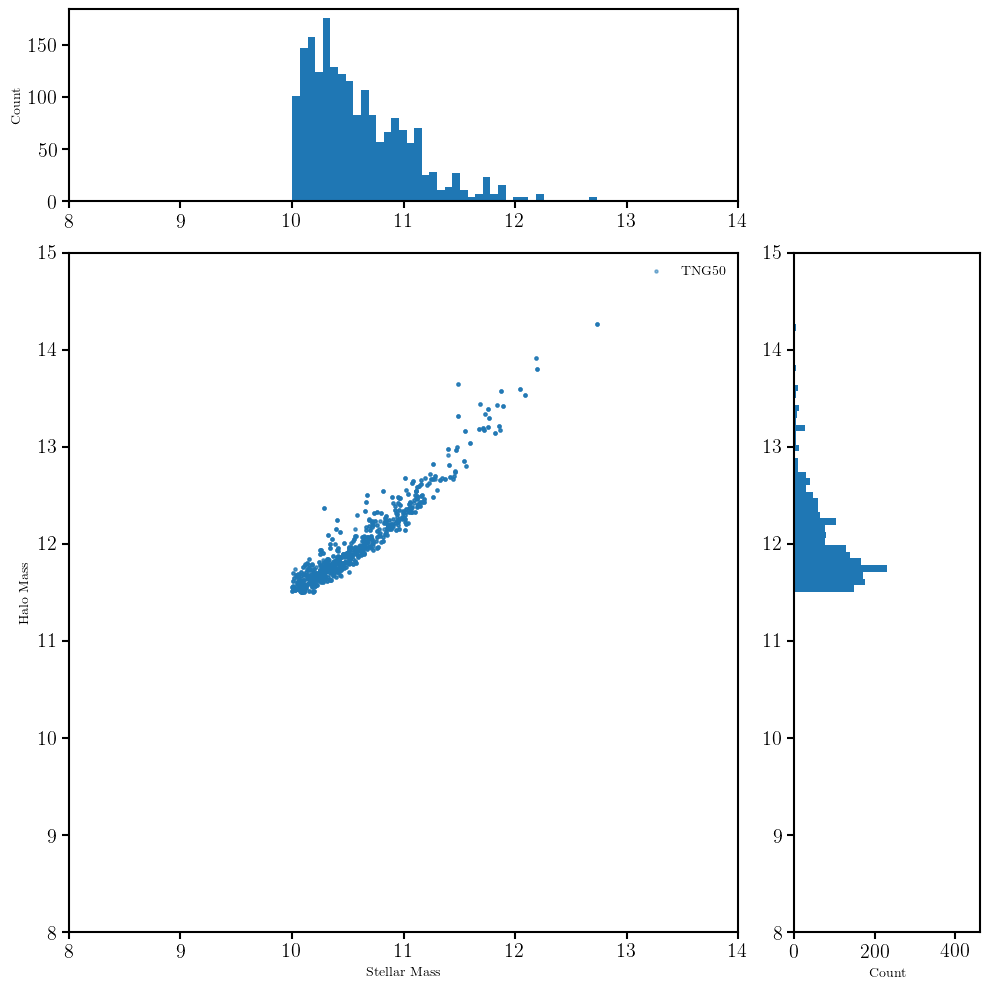

(13986, 2)


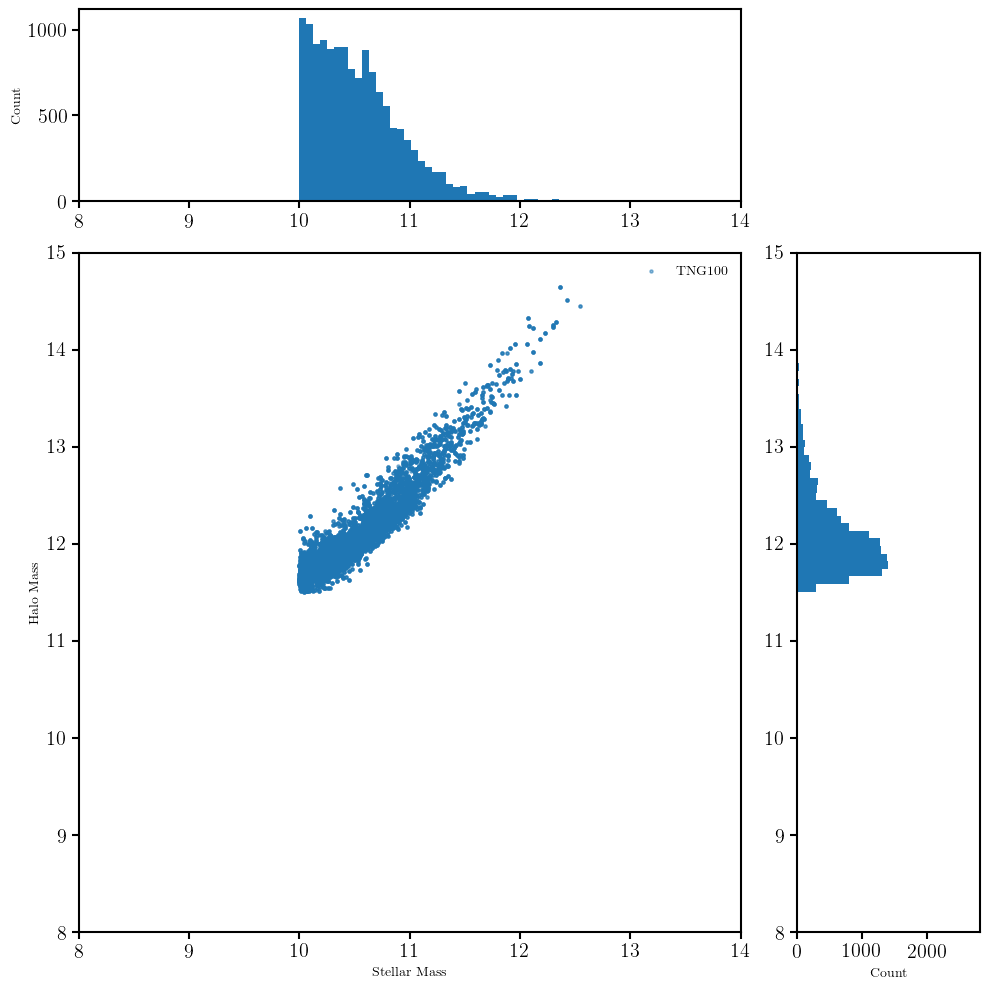

(8082, 2)


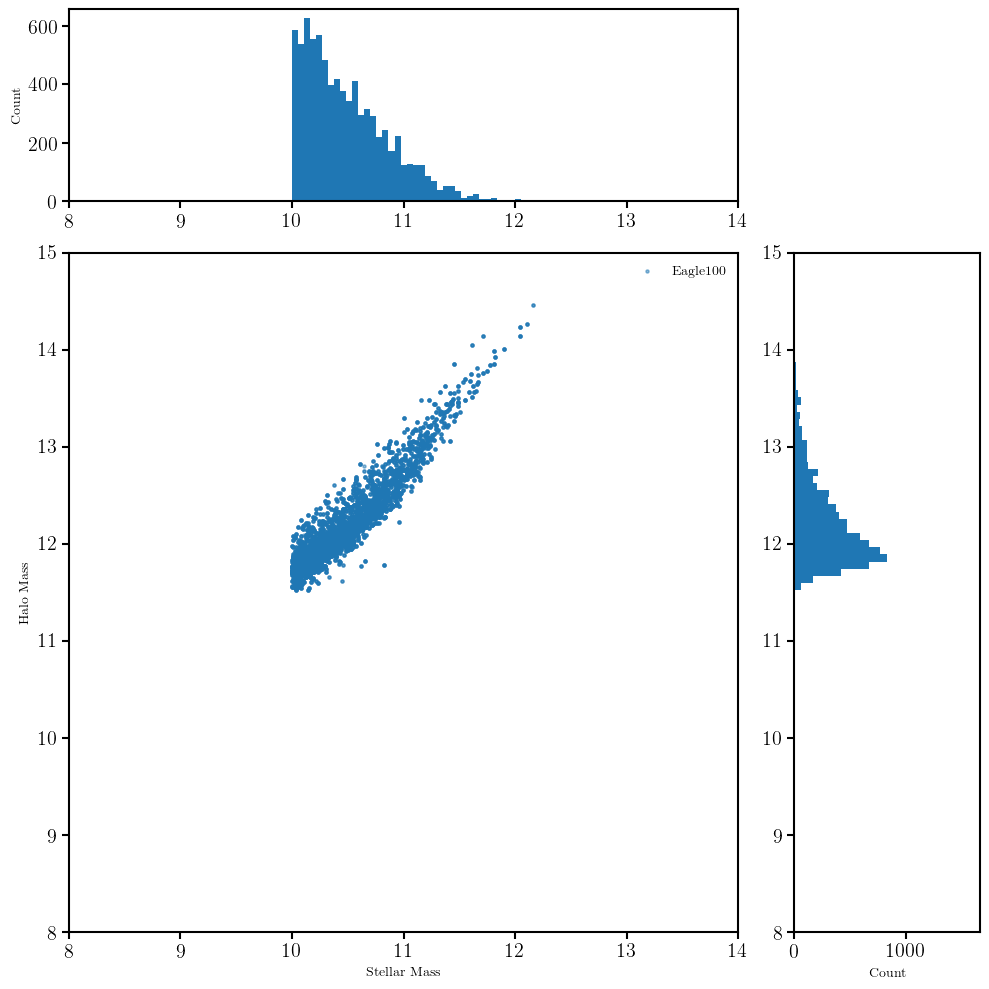

(8151, 2)


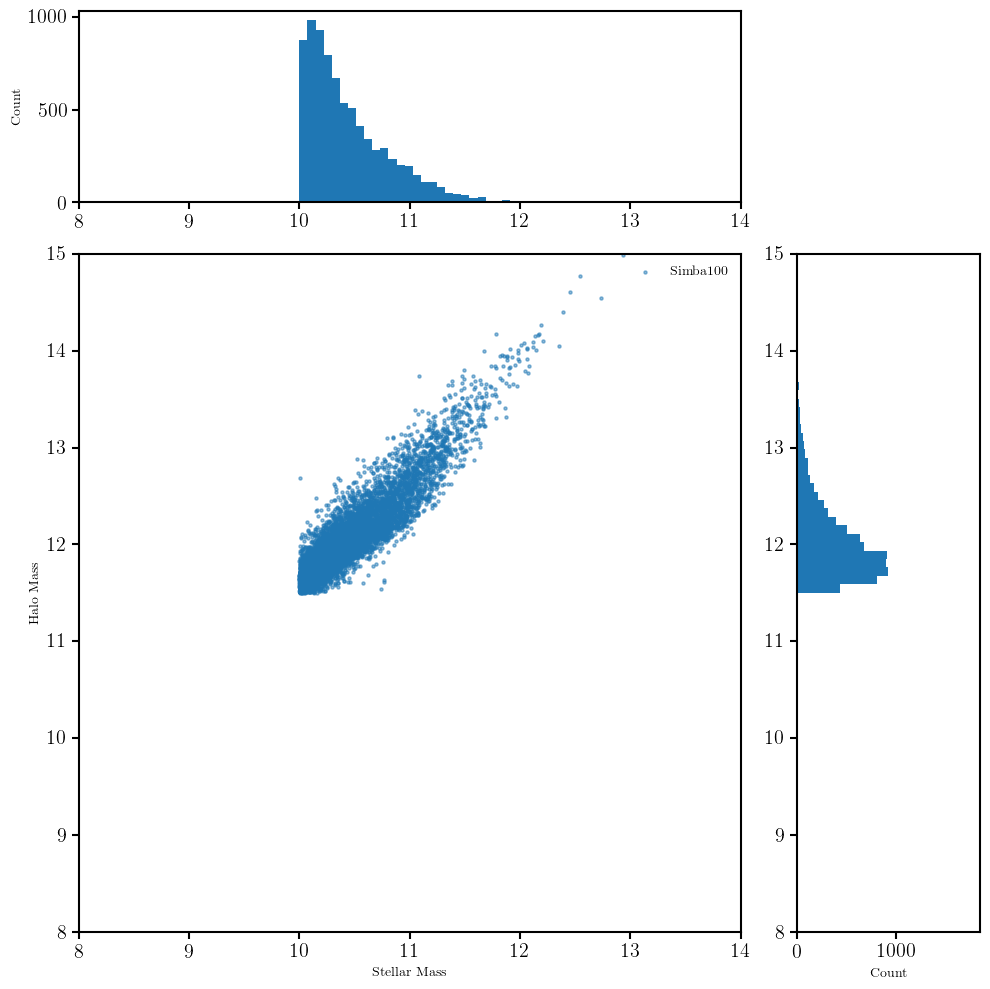

(20703, 2)


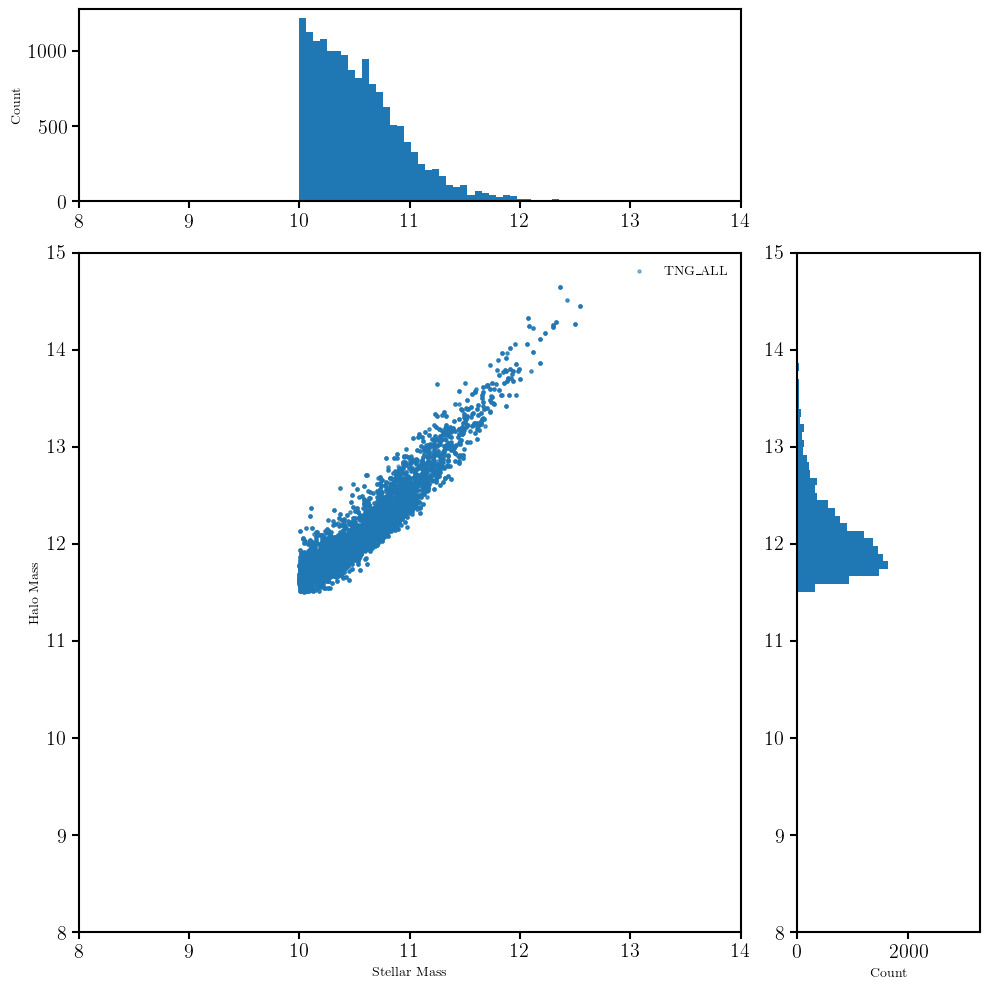

In [10]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

from haloflow.config import setup_plotting_config

setup_plotting_config()

for key in dataset.data.keys():
    # Example data
    dat = dataset.data[key]['Y_train']
    print(dat.shape)
    sm = dat[:, 0]
    hm = dat[:, 1]

#     mass_range_sm = [10.0, 13.]
#     mass_range_hm = [11.5, 15.]
#     mask_sm = (sm > mass_range_sm[0]) & (sm < mass_range_sm[1])
#     mask_hm = (hm > mass_range_hm[0]) & (hm < mass_range_hm[1])
#     sm = sm[mask_sm & mask_hm]
#     hm = hm[mask_sm & mask_hm]

    # Create the figure and grid layout
    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(4, 4)

    # Main scatter plot
    ax_main = plt.subplot(gs[1:4, :3])

    ax_main.scatter(sm, hm, s=5, alpha=0.5, label=key)
    ax_main.set_xlabel('Stellar Mass')
    ax_main.set_ylabel('Halo Mass')
    ax_main.legend()

#     # Gray boxes outside the range
#     ax_main.axvspan(8, mass_range_sm[0], color='gray', alpha=0.5)
#     ax_main.axvspan(mass_range_sm[1], 15, color='gray', alpha=0.5)
#     ax_main.axhspan(9, mass_range_hm[0], color='gray', alpha=0.5)
#     ax_main.axhspan(mass_range_hm[1], 15, color='gray', alpha=0.5)

    # Set limits
    ax_main.set_xlim([8, 14])
    ax_main.set_ylim([8, 15])

    # Top histogram (stellar mass)
    ax_histx = plt.subplot(gs[0, :3], sharex=ax_main)
    ax_histx.hist(sm, bins=40, orientation='vertical')
    ax_histx.set_ylabel('Count')
    # ax_histx.set_xticks([])  # Remove x-ticks for the histogram

    # Right histogram (halo mass)
    ax_histy = plt.subplot(gs[1:4, 3], sharey=ax_main)
    ax_histy.hist(hm, bins=40, orientation='horizontal')
    ax_histy.set_xlabel('Count')
    # ax_histy.set_yticks([])  # Remove y-ticks for the histogram

    # Adjust layout
    plt.tight_layout()
    plt.show()